## AI中重要的数学方法：

1. 概率
2. 迭代
3. SVM 向量机
4. 核函数
5. 随机和梯度

## 第一个最重要的数学思想：Iteration

$$ f(x_1, x_2, x_3) = x_1^2 + x_2 ^3 - x_3 ^ 2 - 4 x_1 * x_2 + 10 x_2 * x3 $$

```
uphill methods

given a function, get the max value of this value

while True:
    x = x + random_noise
    if f(x) > best_value: 
        best_value = f(x)
        x = x
```


## 第二个重要的数学思想：概率和统计的力量

贝叶斯分类 Bayes Classifer 

情况：
    - 垃圾邮件很多
solution:
    - filter: keywords
    - rules: pattern

Assuming $\exists C_1, C_2 $ for $ \forall Mail_i $

问题变成了：

$$ \mathbb{Pr}(C_1 | M)， \mathbb{Pr}(C_2 | M) $$

$$ Pr(c_i | M) = Pr(c_i | w_0 w_1 w_2 w_3 .. w_N) $$ 

$$ Pr(c_1 | M) = \frac{Pr(c_1 w_0 w_1 w_2 .. w_n)}{Pr{(M)}}$$
$$ Pr(c_2 | M) = \frac{Pr(c_2 w_0 w_1 w_2 .. w_n)}{Pr{(M)}}$$

$$ Pr(c_i, w_0, w_1, w_2, w_n) $$

$Rewrite \ as: $

$$Pr(w_0, w_1, w_2, w_3, c_i)$$

=> $Pr(w_0 | w_1, w_2, w_3, .. w_n, c_i) * Pr(w_1, w_2, w_3, .. w_n, c_i)$

=> $Pr(w_0 | c_i) * Pr(w_1, w_2, w_3, .. c_i)$

=> $Pr(w_0 | c_i) * Pr(w_1 | w_2, w_3, .. c_i) Pr(w_2, w_3, .. c_i)$

=> $Pr(w_0 | c_i) * Pr(w_1 | c_i) *   Pr(w_2 | c_i) *... * Pr(w_N | c_i) * Pr(c_i)$

=> $ \prod_{j=0}^{j = N} Pr(w_j | c_i) * Pr(c_i) $

=> $ \prod_{j=0}^{j = N} \frac{Pr(w_j * c_i)}{Pr(c_i)} * Pr(c_i) $

=> $ \prod_{j=0}^{j = N} \frac {\frac{count(w_j \cap c_i)}{count(samples)}} {\frac{count(c_i))}{count(samples)}} * Pr(c_i) $

=> $\prod_{j=0}^{j = N} \frac {count(w_j \cap c_i)}{count(ci)} * Pr(c_i)$


独立事件？？

下列哪些事件是独立事件： 

+ A: 明天8点楼下路过一辆蓝色的车并且路过一辆自行车
+ B: 明天8点楼下出车祸且碰到了人的概率

if events are independent

+ $ Pr(a | b)  = Pr(a) $
+ $ Pr(a | b, c)  = Pr(a | b) $

In [5]:
!mv /Users/gaominquan/Documents/学习资料/数据集/sqlResult_1558435.csv  chinese_news.csv

In [6]:
file_path = "chinese_news.csv "

In [2]:
import pandas as pd

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [11]:
content = pd.read_csv('chinese_news.csv', encoding='gb18030')

In [12]:
len(content)

89611

In [15]:
content['source']

0        快科技@http://www.kkj.cn/
1        快科技@http://www.kkj.cn/
2        快科技@http://www.kkj.cn/
3                           新华社
4                         深圳大件事
                  ...          
89606                       新华社
89607                       新华社
89608                       新华社
89609                       新华社
89610                       新华社
Name: source, Length: 89611, dtype: object

## 如何输入一个新闻，判断新闻是不是新华社的新闻？

！用朴素贝叶斯分类实现

In [110]:
random_indices = np.random.choice(range(len(content)), 1000)

In [112]:
samples = content.iloc[random_indices]

In [113]:
samples = samples[['source', 'content']]

In [114]:
len(samples[samples['source'] == '新华社']) / len(samples)

0.881

0.881

=> $\prod_{j=0}^{j = N} \frac {count(w_j \cap c_i)}{count(ci)} * Pr(新华社)$


+ Pr(新华社) = 0.881%
+ Pr(非新华社) = 1 - 0.881
%

字的概率

In [234]:
from collections import defaultdict

In [235]:
c_of_xinhua_char = defaultdict(int)
c_of_not_xinhua_char = defaultdict(int)

In [236]:
samples = samples.fillna('')

In [237]:
all_xinhua_news = samples[samples['source'] == '新华社']
all_not_xinhua_news = samples[samples['source'] != '新华社']

In [238]:
for row in tqdm_notebook(all_xinhua_news['content']):
    for c in set(row):
        c_of_xinhua_char[c] += 1

print('xinhua analysis finished')


for row in tqdm_notebook(all_not_xinhua_news['content']):
    for c in set(row):
        c_of_not_xinhua_char[c] += 1

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/881 [00:00<?, ?it/s]

xinhua analysis finished


/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/119 [00:00<?, ?it/s]

In [239]:
pr_of_xinhua_char = defaultdict(lambda : 1 / len(all_xinhua_news))
pr_of_not_xinhua_char = defaultdict(lambda : 1 / len(all_not_xinhua_news))

for w, c in c_of_xinhua_char.items():
    pr_of_xinhua_char[w] = c / len(all_xinhua_news)

for w, c in c_of_not_xinhua_char.items():
    pr_of_not_xinhua_char[w] = c / len(all_not_xinhua_news)

In [240]:
len(pr_of_xinhua_char)

3417

In [241]:
len(pr_of_not_xinhua_char)

2572

In [242]:
probability_of_xinhua_char

defaultdict(int,
            {'卓': 3,
             '台': 108,
             '面': 168,
             '聚': 36,
             '越': 50,
             '突': 58,
             '脉': 11,
             '学': 137,
             '工': 204,
             '育': 211,
             '繁': 23,
             '新': 875,
             '画': 25,
             '心': 144,
             '智': 34,
             '位': 156,
             '作': 255,
             '以': 414,
             '2': 696,
             '年': 799,
             '硅': 2,
             '\\': 874,
             '，': 859,
             '。': 849,
             '月': 857,
             '凝': 6,
             '同': 186,
             '全': 235,
             '的': 683,
             '7': 672,
             '方': 214,
             '业': 194,
             '万': 148,
             '为': 327,
             '世': 154,
             '也': 131,
             '谷': 15,
             '华': 874,
             '人': 369,
             '京': 190,
             '障': 39,
             '安': 175,
             '和': 348,
        

In [243]:
from functools import reduce

In [244]:
from operator import mul

In [245]:
def prod(items):
    return reduce(mul, items)

In [246]:
prod([1, 2, 3, 4])

24

In [247]:
import numpy as np

In [248]:
from icecream import ic

In [300]:
prod([pr_of_xinhua_char[c] for c in set(content.iloc[6]['content'])])

3.5001265957498066e-290

In [301]:
prod([pr_of_xinhua_char[c] for c in set(content.iloc[6]['content'])]) * len(all_xinhua_news)

3.0836115308555796e-287

In [304]:
prod([pr_of_not_xinhua_char[c] for c in set(content.iloc[2]['content'])]) * len(all_not_xinhua_news)

9.370334277982639e-84

In [263]:
def classifier(text):
    p0 = prod([pr_of_xinhua_char[c] for c in set(text)]) * len(all_xinhua_news) / len(samples)
    p1 = prod([pr_of_not_xinhua_char[c] for c in set(text)]) * len(all_not_xinhua_news) / len(samples)
    ic(p0, p1)
    return np.argmax([p0, p1])

In [250]:
all_xinhua_news.index

Int64Index([27047, 74552, 41059, 12399, 81628, 47332, 55283, 82726, 80266,
            84496,
            ...
            44717, 54640, 28611, 34326, 41237, 53712, 41549, 13877, 44842,
            52213],
           dtype='int64', length=881)

In [194]:
all_not_xinhua_news

,source,content
1000,环球网,在上周五，刚刚结束的《挑战的法则》中，由潘玮柏、大张伟、戚薇、乔杉、刘维、于小彤组成的首...
6734,广州日报第A13版,中国农业银行\r\n
4933,中国证券报?中证网,主营业务新增人工智能、文旅、影视策划等?\r\n 中证网讯（记者 蒋洁琼）深大通(0...
7589,南方日报第01版,惠州之策\r\n“如果说一个地方没有高技术产生来源，创新城市靠什么来引领？”日前，中国科学院...
5214,广州日报第FS1版,本报品牌价值突破300亿\r\n
...,...,...
11069,微博,
3137,央视新闻,当地时间6月18日，美国联邦调查局(FBI)发消息称，中国女留学生章莹颖在美失联案仍在调查，...
9560,微博,
3711,中国新闻网,中新网6月21日电? 近日，携程宣布，面向所有携程用户的个性化增值服务——“超级会员”正式上...


In [203]:
untrained_indices = list(set(range(len(content))) - set(random_indices))

In [204]:
untrained = content.iloc[untrained_indices][['source', 'content']]

In [205]:
untrained

,source,content
0,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n
4,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...
...,...,...
89606,新华社,新华社照片，多伦多，2017年6月7日\n（体育）（2）冰球——国家女子冰球队海外选秀在多伦...
89607,新华社,新华社兰州6月3日电（王衡、徐丹）记者从甘肃省交通运输厅获悉，甘肃近日集中开建高速公路、普通...
89608,新华社,\n\n2017年5月29日，在法国巴黎郊外的凡尔赛宫，法国总统马克龙出席新闻发布会。（新华...
89609,新华社,\n\n2017年5月25日，在美国马萨诸塞州剑桥市，哈佛大学毕业生在毕业典礼上欢呼。（新华...


In [265]:
untrained.iloc[0]['content']

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [328]:
for row in content[['source', 'content']].sample(10).iterrows():
    print(row[1]['source'])

新华社
南方日报第01版
新华社
中国经济网
新华社
新华社
新华社
新华社
新华社
证券时报


In [332]:
text_with_labels = []

for row in content.sample(2000)[['source', 'content']].iterrows():
    if row[1]['source'] == '新华社':
        text_with_labels.append((0, row[1]['content']))
    else:
        text_with_labels.append((1, row[1]['content']))

In [335]:
ytrue_and_predicated = []

for ytrue, text in text_with_labels:
    if not isinstance(text, str): continue
    
    ypred = classifier(text)
    ytrue_and_predicated.append((ytrue, ypred))

ic| p0: 3.4948878972586595e-263, p1: 1.91978535353043e-205
ic| p0: 5.589572842545168e-42, p1: 4.543092710797815e-53
ic| p0: 5.7983773574458024e-183, p1: 7.085131920283905e-139
ic| p0: 9.043448001966767e-35, p1: 5.0249557787367217e-39
ic| p0: 1.8704346470593838e-37, p1: 4.62663789653564e-47
ic| p0: 6.974597409381408e-41, p1: 3.5055360729795523e-51
ic| p0: 3.739068814450171e-50, p1: 6.1180784159015975e-56
ic| p0: 0.0, p1: 8.510436749858873e-248
ic| p0: 1.7178672819889806e-41, p1: 1.0234207268848908e-51
ic| p0: 5.945801228290273e-305, p1: 2.3556753559309838e-206
ic| p0: 3.226653522694951e-85, p1: 7.15483173143053e-78
ic| p0: 1.4048638750476886e-191, p1: 1.0962255060557775e-110
ic| p0: 1.954240198864392e-93, p1: 2.00428965715917e-80
ic| p0: 2.454431928475166e-271, p1: 7.491288927256349e-219
ic| p0: 1.1951096380492595e-52, p1: 3.6978131571196785e-59
ic| p0: 3.588663137160905e-182, p1: 3.184423251875012e-141
ic| p0: 0.0, p1: 1.9488290980134951e-233
ic| p0: 0.0, p1: 0.0
ic| p0: 2.695143407385

ic| p0: 2.958761241804849e-32, p1: 8.250023810565376e-37
ic| p0: 2.619210359362845e-160, p1: 9.646273613737497e-136
ic| p0: 7.784213062983125e-164, p1: 3.115527404306271e-124
ic| p0: 5.268958055625812e-49, p1: 6.754514921241666e-54
ic| p0: 1.0111009696342146e-40, p1: 2.6184344177426955e-48
ic| p0: 6.954719407461736e-36, p1: 7.1788651226203e-45
ic| p0: 8.747371056486533e-37, p1: 1.131492246768048e-47
ic| p0: 9.408546533205889e-28, p1: 2.3575276781800964e-35
ic| p0: 5.0069561507907265e-213, p1: 5.373895945635314e-153
ic| p0: 6.279962984132439e-194, p1: 9.508570620820536e-157
ic| p0: 3.763111467950641e-31, p1: 3.2679412825622244e-30
ic| p0: 6.360021570224232e-72, p1: 8.400535232560137e-62
ic| p0: 1.1219298217137583e-49, p1: 2.663980513824135e-53
ic| p0: 0.0, p1: 0.0
ic| p0: 0.0, p1: 5.474702088511461e-261
ic| p0: 3.310580066862504e-75, p1: 1.3469295380195176e-65
ic| p0: 1.1718181557214175e-22, p1: 1.2998472690909923e-28
ic| p0: 3.124746101799815e-63, p1: 2.9957003530781073e-59
ic| p0: 5.0

ic| p0: 5.3691852147890476e-201, p1: 6.989186718348879e-134
ic| p0: 1.0226954456597825e-36, p1: 2.3311660364508093e-44
ic| p0: 1.6924699296032516e-42, p1: 3.3367116957999315e-48
ic| p0: 1.7823903015619595e-156, p1: 6.797966781545156e-124
ic| p0: 1.5116468892880222e-61, p1: 2.858914806746563e-51
ic| p0: 2.3100094186156206e-120, p1: 1.0375276693582183e-98
ic| p0: 1.5433585415177573e-46, p1: 7.894787908081638e-45
ic| p0: 2.7281199328138046e-20, p1: 1.3127346623640612e-27
ic| p0: 2.5633268000492036e-50, p1: 4.52423750002414e-54
ic| p0: 1.29440973030146e-55, p1: 4.578782340861096e-56
ic| p0: 2.8105756471475216e-27, p1: 1.6882398007675205e-33
ic| p0: 6.004766120391487e-58, p1: 3.49940436020359e-66
ic| p0: 1.7879892068013807e-52, p1: 3.118988567724581e-50
ic| p0: 2.3512161004258618e-125, p1: 2.644110014409249e-105
ic| p0: 1.612333564789911e-70, p1: 1.643359178786674e-63
ic| p0: 3.3633406666843875e-38, p1: 1.3743749092780733e-40
ic| p0: 3.6858373034486715e-111, p1: 9.280840332069284e-97
ic| p0

ic| p0: 2.7102974493669896e-44, p1: 7.563017626555904e-48
ic| p0: 7.140452412873674e-79, p1: 1.2572088652268951e-67
ic| p0: 5.348902849675167e-78, p1: 6.398234677078485e-77
ic| p0: 2.7652504989959655e-68, p1: 5.57106377180006e-56
ic| p0: 4.185555351769876e-115, p1: 3.730123334638053e-87
ic| p0: 1.41129547268836e-46, p1: 1.1083746134387324e-45
ic| p0: 8.391918178665069e-78, p1: 4.158414689069723e-61
ic| p0: 9.901628505584874e-41, p1: 1.4011187774093126e-49
ic| p0: 1.8301751743757966e-57, p1: 1.882115049884698e-53
ic| p0: 2.4962611025125616e-37, p1: 4.127933480167384e-41
ic| p0: 3.764428487123933e-40, p1: 9.485195337332735e-45
ic| p0: 2.4265512535541387e-103, p1: 2.7632156124720985e-92
ic| p0: 2.5075761954918303e-130, p1: 4.868355475568251e-99
ic| p0: 4.429562196790594e-150, p1: 6.811879260230024e-109
ic| p0: 1.1625962934273694e-36, p1: 3.2749659730639086e-43
ic| p0: 2.6712051209397768e-148, p1: 1.0708538127234243e-123
ic| p0: 3.592112104598003e-47, p1: 2.8654075858906016e-43
ic| p0: 4.7

ic| p0: 1.1786736182785362e-38, p1: 7.610184404449274e-48
ic| p0: 5.259294911143282e-255, p1: 8.263793020194746e-200
ic| p0: 1.2781577295706666e-36, p1: 1.0922994836610555e-42
ic| p0: 5.462738471174043e-44, p1: 1.1272416579130154e-51
ic| p0: 1.7664022802336204e-39, p1: 3.35574556077593e-45
ic| p0: 3.52735744704136e-31, p1: 2.383814975537295e-39
ic| p0: 7.075770417323344e-21, p1: 3.791934180316308e-27
ic| p0: 1.8216284241855e-311, p1: 2.752725297968107e-199
ic| p0: 2.0231135732781552e-38, p1: 1.298092289360812e-42
ic| p0: 7.135594968485011e-32, p1: 7.373407007694888e-36
ic| p0: 0.0, p1: 1.0989279378207568e-293
ic| p0: 3.93308147387706e-207, p1: 3.481162750038247e-157
ic| p0: 0.0, p1: 0.0
ic| p0: 5.144469825945284e-28, p1: 2.435141614086534e-34
ic| p0: 0.0, p1: 0.0
ic| p0: 7.894871715438708e-127, p1: 6.98172010894432e-99
ic| p0: 1.9339308221928062e-166, p1: 3.0795745254053194e-131
ic| p0: 3.3300436287749883e-60, p1: 1.3478170993620324e-49
ic| p0: 1.4912017223297347e-200, p1: 5.0090497064

ic| p0: 1.473283391542138e-153, p1: 5.379374519067887e-103
ic| p0: 5.181919202304944e-79, p1: 7.521957331284307e-66
ic| p0: 1.5818640336757308e-34, p1: 2.6218224696075647e-37
ic| p0: 1.7381667199472e-311, p1: 5.9868215367342e-219
ic| p0: 5.0303330409508615e-54, p1: 2.009755243367191e-51
ic| p0: 2.1765390194256243e-103, p1: 7.864162793872136e-82
ic| p0: 4.727365158427357e-38, p1: 1.1391228343733085e-42
ic| p0: 7.857012402053614e-42, p1: 8.851317225150169e-49
ic| p0: 1.0071014594655663e-216, p1: 9.923101573757228e-156
ic| p0: 2.4822364884726624e-78, p1: 1.1497878803283342e-67
ic| p0: 1.8464554752933728e-149, p1: 8.5989935229905e-132
ic| p0: 1.5565221352277444e-56, p1: 9.554264481226228e-54
ic| p0: 2.277304434913311e-190, p1: 7.157148381066932e-146
ic| p0: 2.0153327178449205e-252, p1: 6.0975102209278734e-186
ic| p0: 6.220312437253775e-19, p1: 3.0647806600464035e-26
ic| p0: 1.0078408231295099e-295, p1: 3.6820289702068894e-203
ic| p0: 6.981681764888566e-100, p1: 1.3101618823348716e-91
ic| p

ic| p0: 1.9327470984326176e-60, p1: 2.7924588942783716e-64
ic| p0: 3.5919599277013355e-71, p1: 9.999400079101809e-79
ic| p0: 8.027434863420755e-153, p1: 2.5093261046722793e-119
ic| p0: 1.5222103159223116e-55, p1: 1.3072794953496452e-48
ic| p0: 2.2051117357677387e-64, p1: 2.601122354412576e-60
ic| p0: 3.624805276284222e-187, p1: 1.2383374095456012e-156
ic| p0: 2.370638073754528e-140, p1: 4.7273872559758494e-119
ic| p0: 2.016352191279242e-18, p1: 4.683162175277359e-27
ic| p0: 3.941517326353918e-40, p1: 4.854274164285731e-47
ic| p0: 4.231707828894945e-39, p1: 1.2236002893699472e-44
ic| p0: 0.0, p1: 0.0
ic| p0: 2.7913383124430804e-276, p1: 6.718295211007639e-196
ic| p0: 6.484028462423016e-52, p1: 2.7816263553753226e-52
ic| p0: 2.3841527369097287e-44, p1: 4.91065142848093e-43
ic| p0: 1.9093262622377482e-87, p1: 4.800229246404018e-73
ic| p0: 2.3805510748835627e-105, p1: 7.880066043905736e-92
ic| p0: 2.493937372800928e-44, p1: 3.2891716827687474e-45
ic| p0: 5.2304479495652624e-48, p1: 9.96531

ic| p0: 1.985362086236452e-65, p1: 2.9877063083373047e-61
ic| p0: 0.0, p1: 1.0038989722913629e-282
ic| p0: 5.625942219821e-311, p1: 4.830485808632736e-218
ic| p0: 1.0347036514870793e-163, p1: 7.821659962250623e-126
ic| p0: 1.9888540115051135e-136, p1: 1.8483083855072978e-118
ic| p0: 1.114298565774914e-68, p1: 5.1237157140093737e-67
ic| p0: 1.0392782560655471e-304, p1: 9.88424821982258e-218
ic| p0: 5.088597912159276e-63, p1: 1.9352802673084494e-52
ic| p0: 0.0, p1: 2.715788759570814e-263
ic| p0: 0.0, p1: 3.98672726465328e-306
ic| p0: 2.6951434073859844e-59, p1: 1.1468157790902833e-65
ic| p0: 7.231805216308297e-83, p1: 1.4570377702496285e-67
ic| p0: 8.597869525734682e-104, p1: 2.218037476664378e-81
ic| p0: 1.0604087291260406e-41, p1: 1.2425691997929877e-45
ic| p0: 4.148551441039274e-37, p1: 2.7152927517815636e-40
ic| p0: 3.5990795524979174e-303, p1: 2.870305239540213e-209
ic| p0: 1.7198709062800136e-28, p1: 4.687822091610674e-31
ic| p0: 6.206751417700601e-41, p1: 4.684661837351501e-52
ic|

ic| p0: 1.1992568657257093e-76, p1: 2.9684057095789882e-64
ic| p0: 2.4244625863166816e-56, p1: 7.44361417809862e-58
ic| p0: 0.0, p1: 5.205588705304962e-217
ic| p0: 2.2773651621915603e-41, p1: 8.672956627320611e-48
ic| p0: 7.500972861850535e-49, p1: 1.029730410408636e-50
ic| p0: 0.0, p1: 0.0
ic| p0: 0.0, p1: 0.0
ic| p0: 7.99977339188201e-285, p1: 8.000597067667176e-183
ic| p0: 3.4332777864887465e-171, p1: 4.726879033829406e-128
ic| p0: 1.3452657604703993e-44, p1: 1.0849219589710323e-52
ic| p0: 1.377944987182082e-44, p1: 8.157939555158031e-55
ic| p0: 5.512953880549566e-39, p1: 2.7613570728272274e-49
ic| p0: 1.2090138185510066e-43, p1: 9.538957442601825e-51
ic| p0: 2.295107107462088e-93, p1: 3.1827294948218483e-80
ic| p0: 1.90884124294885e-39, p1: 6.468949771567811e-41
ic| p0: 8.692732135489945e-210, p1: 7.812811300347211e-144
ic| p0: 3.082871019013327e-36, p1: 1.6284488178674613e-39
ic| p0: 7.186916156814408e-83, p1: 1.930855703415565e-76
ic| p0: 0.0, p1: 1.4058532456293511e-294
ic| p0: 

ic| p0: 1.2212042992815955e-76, p1: 3.5908939622468398e-68
ic| p0: 1.2762018246705396e-118, p1: 1.8768180280742727e-102
ic| p0: 1.1237461932101057e-54, p1: 6.725690599126424e-45
ic| p0: 2.99807976282429e-231, p1: 1.3024919239848649e-191
ic| p0: 3.8325875704002364e-216, p1: 5.672508473090001e-166
ic| p0: 6.790958287738119e-279, p1: 4.519972819833443e-186
ic| p0: 3.485931362757189e-56, p1: 1.4308075486836698e-51
ic| p0: 0.0, p1: 3.111322643104099e-232
ic| p0: 6.012211448935457e-43, p1: 9.272958771209464e-42
ic| p0: 2.3483103111294228e-42, p1: 1.7735563794054054e-49
ic| p0: 2.433226838218964e-219, p1: 9.713948906026656e-151
ic| p0: 6.328208060156604e-157, p1: 6.704504880471105e-144
ic| p0: 2.173474399934559e-92, p1: 6.65222999441613e-74
ic| p0: 9.66778017957652e-125, p1: 3.946665400621789e-98
ic| p0: 1.2530253755085633e-164, p1: 2.0963694654981187e-138
ic| p0: 1.1634295461643834e-98, p1: 6.750051309763303e-109
ic| p0: 2.5390027900082217e-62, p1: 9.881649922839513e-54
ic| p0: 4.90117203258

ic| p0: 1.5609730935975476e-41, p1: 1.1532263682355996e-47
ic| p0: 9.395070366574715e-54, p1: 1.9564607146548627e-53
ic| p0: 7.134311399907314e-82, p1: 9.646613199719737e-67
ic| p0: 3.6504710536595185e-173, p1: 2.0120484323511843e-138
ic| p0: 5.681999954380748e-23, p1: 5.6099196476922484e-24
ic| p0: 1.596279373224487e-101, p1: 1.2063811672793344e-78
ic| p0: 6.661646085492373e-150, p1: 2.5337562561728555e-118
ic| p0: 1.1892317862691278e-81, p1: 2.809367743396873e-73
ic| p0: 1.1008567006956091e-45, p1: 3.376455385108136e-50
ic| p0: 4.638968937951124e-22, p1: 8.741954447373957e-27
ic| p0: 2.3347288985270748e-200, p1: 5.557155628199241e-146
ic| p0: 5.48466708195641e-99, p1: 8.753440775458251e-74
ic| p0: 1.1486433544012288e-40, p1: 7.113576471365924e-52
ic| p0: 6.264777615743444e-54, p1: 1.2302723892827998e-59
ic| p0: 2.7704111308157003e-109, p1: 6.768626735482994e-90
ic| p0: 8.677958030801633e-198, p1: 1.7631819727458203e-150
ic| p0: 1.524178291140807e-38, p1: 1.4207321718825117e-45
ic| p0

ic| p0: 3.191556873127447e-26, p1: 1.5325711587498335e-33
ic| p0: 1.55256382617791e-109, p1: 1.7608393391911847e-86
ic| p0: 1.5466770175535108e-192, p1: 3.1901793203027547e-161
ic| p0: 8.394682976503395e-63, p1: 7.708239646160708e-56
ic| p0: 0.0, p1: 0.0
ic| p0: 0.0, p1: 3.503930811615753e-274
ic| p0: 2.7186405282341756e-17, p1: 2.6185697658247974e-19
ic| p0: 7.287348594834202e-172, p1: 2.3457374958003614e-140
ic| p0: 7.43382746237957e-125, p1: 2.967070879752901e-91
ic| p0: 9.965062869469572e-196, p1: 3.027348956166786e-151
ic| p0: 1.3019076101553834e-65, p1: 1.534798892202108e-74
ic| p0: 5.9099830753257494e-27, p1: 3.7160379505739346e-27
ic| p0: 1.4342703104654072e-84, p1: 2.692557592508058e-66
ic| p0: 1.794738743833209e-26, p1: 1.7015403620393206e-30
ic| p0: 3.159819866894895e-126, p1: 3.477225158207405e-97
ic| p0: 2.70006304752287e-49, p1: 5.017283985220166e-43
ic| p0: 1.5389892341637403e-38, p1: 4.0617376991042974e-38
ic| p0: 2.4966456899149133e-20, p1: 6.302905479570575e-10
ic| p0

ic| p0: 1.3716167194026649e-237, p1: 2.138102242600271e-183
ic| p0: 3.25664125300324e-167, p1: 1.0870827949459976e-125
ic| p0: 1.7316078084985426e-208, p1: 2.2790783152723323e-150
ic| p0: 2.0096681648209736e-46, p1: 1.4198456595061671e-55
ic| p0: 0.0, p1: 5.987431473606061e-300
ic| p0: 9.70454892740839e-34, p1: 9.109195659595322e-42
ic| p0: 5.4338402749074316e-102, p1: 8.769500611791701e-82
ic| p0: 9.365852393741421e-283, p1: 3.816931301744693e-184
ic| p0: 2.0148430980601816e-46, p1: 5.588075863605226e-29
ic| p0: 3.784932322240462e-304, p1: 6.9239748220333514e-189
ic| p0: 2.3285822045363321e-175, p1: 2.3993642309310032e-126
ic| p0: 0.0, p1: 3.4155490030275213e-240
ic| p0: 1.0973721705688637e-53, p1: 1.4561339653802128e-53
ic| p0: 3.874589832902553e-26, p1: 1.8262061680758667e-32
ic| p0: 5.2250980264198786e-36, p1: 1.7125013262261957e-46
ic| p0: 1.802262805938457e-36, p1: 4.1123881054466725e-42
ic| p0: 1.4279229337991215e-33, p1: 6.965008015457485e-34
ic| p0: 5.8508417237071184e-244, p1

ic| p0: 5.495023016369993e-29, p1: 1.7542812265551467e-33
ic| p0: 2.3708719181743774e-52, p1: 1.2440896048087883e-58
ic| p0: 6.179592733737643e-57, p1: 2.138856457290453e-54
ic| p0: 0.0, p1: 0.0
ic| p0: 0.0, p1: 4.432174040812429e-283
ic| p0: 2.867173024197422e-79, p1: 2.688458960216247e-67
ic| p0: 0.0, p1: 5.524861588332358e-257
ic| p0: 8.311875207854899e-41, p1: 1.279666781148868e-51
ic| p0: 1.4632340812199804e-28, p1: 7.71286072164835e-34
ic| p0: 9.543481227483304e-60, p1: 2.550488750281396e-49
ic| p0: 0.0, p1: 4.1068008e-315
ic| p0: 1.1193719853617887e-35, p1: 8.550207652828282e-41
ic| p0: 1.6162932688323608e-33, p1: 2.0695302667163643e-40
ic| p0: 3.4603613214709854e-28, p1: 6.760174072394327e-35
ic| p0: 4.6054026339179055e-127, p1: 3.4085753893375873e-107
ic| p0: 1.188934643865375e-31, p1: 2.223386933069214e-34


In [339]:
right = [i for i, (y1, y2) in enumerate(ytrue_and_predicated) if y1 == y2]

In [341]:
len(right)

961

## Remain: SVM、微积分（梯度）在AI中的作用

$$ f(\vec{x}) = \hat{y} $$

+ Representation: $\vec{x} $ 
+ Policy: $ f $

+ Tensorflow 
+ Torch 

$ f(\vec{x}; \theta) = \hat{y} $

## 梯度下降

## Given : [(y1, x1), (y2, x2), (y3, x3), (yN, xN)]

$$ f(\vec{x}; \theta) = x_0* \theta_0 + x_1 * \theta_1 + b $$ 

$$ min_{\theta}(Loss({\theta})) = |f(\vec{x}; \theta) - y_{true} | $$
$$ min_{\theta}(Loss({\theta})) = (( x_0* \theta_0 + x_1 * \theta_1 + b ) - y_{true} ) ^ 2 $$


$$ {\vec{\theta}}_{t+1} = \vec{\theta}_t - \alpha \nabla loss(\vec{\theta}) $$

## 凸优化

$$ {\vec{\theta}}_{t+1} = \vec{\theta}_t - \alpha \nabla loss(\vec{\theta}) $$

$$ {\vec{\theta}}_{t+1} = \vec{\theta}_t - \alpha [2(\hat{y} - y_t)x_0, 2(\hat{y} - y_t) x_1, 2(\hat{y} - y_t) )]$$

In [343]:
from sklearn.datasets import load_boston

In [344]:
boston_data = load_boston()

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [347]:
boston_data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [357]:
CRIM = boston_data['data'][0: ]

In [361]:
CRIM

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [363]:
CRIM = boston_data['data'][:, 0]
RM = boston_data['data'][:, 6]

In [366]:
Y = boston_data['target']

In [370]:
def 𝑓(x, theta):
    """
    theta[0], w0
    theta[1], w1
    theta[2], w
    """
    #return x[0] * theta[0] + theta[1] * w[1] + theta[2]
    return np.dot(x, theta[:-1]) + theta[2]

In [372]:
def loss(ytrue, yhat):
    return (ytrue - yhat) ** 2

In [381]:
from queue import deque

In [425]:
weights = np.array([0, 0, 0])
losses = deque(maxlen=10)
loss_histroy = []

for i, (x1, x2, y) in enumerate(zip(CRIM[:100], RM[:100], Y[:100])):
    yhat = f([x1, x2], weights)

    diff = yhat - y
    
    gradients = np.array([
        diff * x1,
        diff * x2,
        diff * 1
    ])
    losses.append(loss(yhat, y))

    if i % 5 == 0: 
        print(f'mean loss = {np.mean(losses)}')
        loss_histroy.append(np.mean(losses))
        
    if len(loss_histroy) > 2 and (loss_histroy[-1] > loss_histroy[-2]):
        break

    alpha = 1e-4
    weights = weights - alpha * gradients

mean loss = 576.0
mean loss = 257.0824348229101
mean loss = 147.93500253261774
mean loss = 82.36520294302751
mean loss = 91.78943908878776


In [426]:
import matplotlib.pyplot as plt

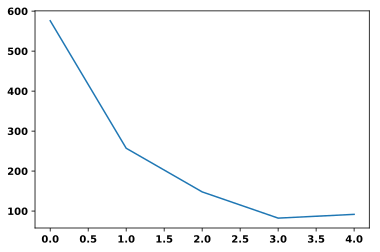

In [421]:
plt.plot(loss_histroy)

In [369]:
weights

array([0.96237357, 0.433431  , 0.58253265])

In [364]:
CRIM

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [365]:
RM

array([ 65.2,  78.9,  61.1,  45.8,  54.2,  58.7,  66.6,  96.1, 100. ,
        85.9,  94.3,  82.9,  39. ,  61.8,  84.5,  56.5,  29.3,  81.7,
        36.6,  69.5,  98.1,  89.2,  91.7, 100. ,  94.1,  85.7,  90.3,
        88.8,  94.4,  87.3,  94.1, 100. ,  82. ,  95. ,  96.9,  68.2,
        61.4,  41.5,  30.2,  21.8,  15.8,   2.9,   6.6,   6.5,  40. ,
        33.8,  33.3,  85.5,  95.3,  62. ,  45.7,  63. ,  21.1,  21.4,
        47.6,  21.9,  35.7,  40.5,  29.2,  47.2,  66.2,  93.4,  67.8,
        43.4,  59.5,  17.8,  31.1,  21.4,  36.8,  33. ,   6.6,  17.5,
         7.8,   6.2,   6. ,  45. ,  74.5,  45.8,  53.7,  36.6,  33.5,
        70.4,  32.2,  46.7,  48. ,  56.1,  45.1,  56.8,  86.3,  63.1,
        66.1,  73.9,  53.6,  28.9,  77.3,  57.8,  69.6,  76. ,  36.9,
        62.5,  79.9,  71.3,  85.4,  87.4,  90. ,  96.7,  91.9,  85.2,
        97.1,  91.2,  54.4,  81.6,  92.9,  95.4,  84.2,  88.2,  72.5,
        82.6,  73.1,  65.2,  69.7,  84.1,  92.9,  97. ,  95.8,  88.4,
        95.6,  96. ,